In [1]:
# !pip install --upgrade --force-reinstall shapely


# In this notebook we will be doing a quality check and quality assurance

In [2]:
# Set a working directory
import os

directory_path = '/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/'
os.chdir(directory_path)


In [3]:
import pandas as pd

covari_path = 'data/modified/data_clean_covari.csv'
#using pandas to read in as a df
covari = (pd.read_csv(covari_path,parse_dates=[0]))
#taking a peak at the data
covari.head(3)


,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POSi,...,NH4,FeT,DOP,DON,DOFe,DOC,DIC,CDOM,ALK,par
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665,0.0193
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665,0.0193
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,1.282981,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665,0.0193


## looking for relationshiops between all variables

In [4]:
import seaborn
import matplotlib.pyplot as plt

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_6500/872945855.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = seaborn.heatmap(covari_floats.corr().abs(),


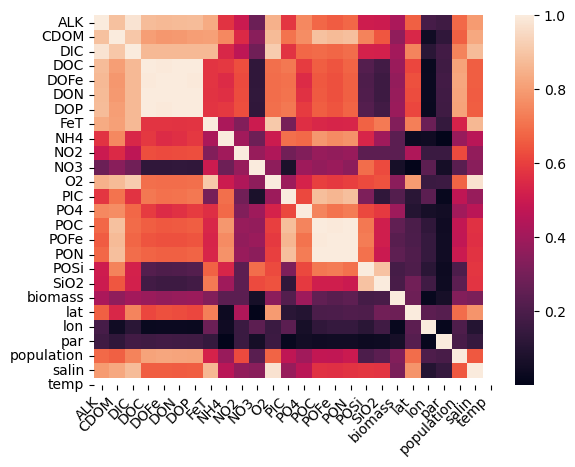

In [6]:
covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass'])]


corr = seaborn.heatmap(covari_floats.corr().abs(),
                xticklabels=covari_floats.columns,
                yticklabels=covari_floats.columns)
plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
plt.show()

#corr.figure.savefig("/figures/validation/correlation_plot.png")


## What variables are most related? 

In [7]:
covari_corr = covari_floats.corr().abs().unstack()
covari_corr = covari_corr.sort_values(kind="quicksort")

print(covari_corr[covari_corr.between(0.89, 0.99)])

covari.drop(['DOP', 'DOFe', 'DON', 'POFe', 'POSi', 'PON'], axis=1, inplace=True)

POSi  SiO2    0.893374
SiO2  POSi    0.893374
DIC   CDOM    0.905690
CDOM  DIC     0.905690
FeT   O2      0.907475
O2    FeT     0.907475
      DIC     0.915336
DIC   O2      0.915336
O2    temp    0.976024
temp  O2      0.976024
DIC   ALK     0.978823
ALK   DIC     0.978823
dtype: float64


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_6500/1683920784.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covari_corr = covari_floats.corr().abs().unstack()


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_6500/1412533432.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(covari_floats.corr().abs(),


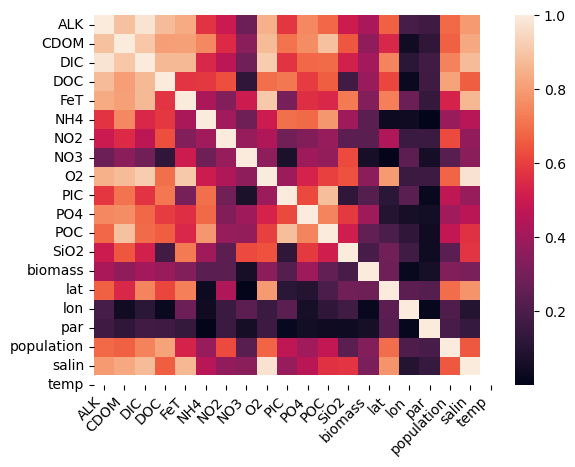

In [8]:
covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass'])]


seaborn.heatmap(covari_floats.corr().abs(),
                xticklabels=covari_floats.columns,
                yticklabels=covari_floats.columns)
plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
plt.show()

### Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interaction

In [9]:
# correlation_matrix = covari.corr()

# threshold = 0.8
# highly_correlated_features = []

# # iterate through the correlation matrix and identify highly correlated features
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             # append the pair of highly correlated features to the list
#             feature_i = correlation_matrix.columns[i]
#             feature_j = correlation_matrix.columns[j]
#             highly_correlated_features.append((feature_i, feature_j))
# highly_correlated_features

In [10]:
# # remove one feature from each highly correlated pair
# for feature_i, feature_j in highly_correlated_features:
#     importance_i = covari[feature_i].std()  # you can use any measure of importance here
#     importance_j = covari[feature_j].std()  # you can use any measure of importance here

#     # remove the feature with lower importance
#     if importance_i > importance_j:
#         covari.drop(feature_j, axis=1, inplace=True)
#     else:
#         covari.drop(feature_i, axis=1, inplace=True)


## Dropping uneeded columns

### renaming population names

In [11]:
covari['population'] = (
    covari['population']
    .replace({'picoeuk' : 'non_pro_syn'})
)
covari.head(5)

,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POC,...,O2,NO3,NO2,NH4,FeT,DOC,DIC,CDOM,ALK,par
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.87665,0.019300
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.87665,0.019300
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.87665,0.019300
3,2016-04-20 07:00:00,picoeukaryotes (< 2µm),21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.87665,0.019300
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.87665,0.020382


In [12]:
covari

,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POC,...,O2,NO3,NO2,NH4,FeT,DOC,DIC,CDOM,ALK,par
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.876650,0.019300
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.876650,0.019300
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.876650,0.019300
3,2016-04-20 07:00:00,picoeukaryotes (< 2µm),21.520326,-158.326984,0.701902,34.893785,24.351745,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.876650,0.019300
4,2016-04-20 08:00:00,Prochlorococcus,21.662710,-158.323430,9.309387,34.902376,24.339265,KOK1606,-0.022845,0.032884,...,214.191393,2.252042,0.295276,1.282981,0.000015,1.648093,1697.874775,0.000034,1954.876650,0.020382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,2021-12-30 00:00:00,picoeukaryotes (< 2µm),32.673493,-117.545342,3.774488,33.468151,15.189021,TN398,0.363296,0.574926,...,249.706220,2.320901,0.202274,0.242743,0.000497,19.695796,1819.587625,0.000756,2008.417775,127.692150
11127,2021-12-30 01:00:00,Prochlorococcus,32.682100,-117.660321,0.874599,33.478846,15.327302,TN398,0.363296,0.574926,...,249.706220,2.320901,0.202274,0.242743,0.000497,19.695796,1819.587625,0.000756,2008.417775,1.012800
11128,2021-12-30 01:00:00,Synechococcus,32.682100,-117.660321,9.707579,33.478846,15.327302,TN398,0.363296,0.574926,...,249.706220,2.320901,0.202274,0.242743,0.000497,19.695796,1819.587625,0.000756,2008.417775,1.012800
11129,2021-12-30 01:00:00,nanoeukaryotes (2-5µm),32.682100,-117.660321,2.428084,33.478846,15.327302,TN398,0.363296,0.574926,...,249.706220,2.320901,0.202274,0.242743,0.000497,19.695796,1819.587625,0.000756,2008.417775,1.012800




## Saving machine learning ready dataset

In [ ]:
covari.to_csv('data/modified/RF_ready_covari.csv', index=False)